In [1]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

In [ ]:
# RNN model
state_t = 0
for input_t in input_sequence:
    output_t = f(input_t, state_t) # f is a function
    state_t = output

# f can be write as :
activation(dot(W, input_t) + dot(U, state_t) + b)
# W and U is a matrix

In [1]:
# Simple RNN with numpy
import numpy as np

timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features))

successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    
    successive_outputs.append(output_t)
    state_t = output_t
    
final_output_sequence = np.stack(successive_outputs, axis=0)
# np.stack =>> Join a sequence of arrays along a new axis.
# successive_outputs is a list , use np.stack to turn into a 2dims np array

In [ ]:
# the simple RNN actually represent in SimpleRNN
from keras.layers import  SimpleRNN

In [9]:
# A simple Example of RNN
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
model = Sequential()

model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [12]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [14]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
    num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [16]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 15s 743us/step - loss: 0.5651 - acc: 0.7023 - val_loss: 0.4279 - val_acc: 0.8184
Epoch 2/10
20000/20000 [==============================] - 15s 729us/step - loss: 0.3527 - acc: 0.8572 - val_loss: 0.3321 - val_acc: 0.8678
Epoch 3/10
20000/20000 [==============================] - 15s 728us/step - loss: 0.2760 - acc: 0.8935 - val_loss: 0.3661 - val_acc: 0.8464
Epoch 4/10
20000/20000 [==============================] - 15s 729us/step - loss: 0.2354 - acc: 0.9134 - val_loss: 0.3272 - val_acc: 0.8698
Epoch 5/10
20000/20000 [==============================] - 15s 729us/step - loss: 0.1856 - acc: 0.9317 - val_loss: 0.3805 - val_acc: 0.8450
Epoch 6/10
20000/20000 [==============================] - 15s 729us/step - loss: 0.1397 - acc: 0.9506 - val_loss: 0.4000 - val_acc: 0.8420
Epoch 7/10
20000/20000 [==============================] - 15s 728us/step - loss: 0.0989 - acc: 0.9673 - val_loss: 0.4

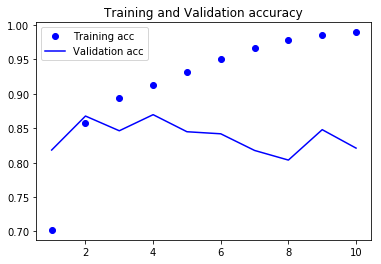

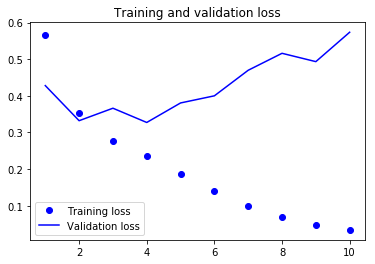

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# LSTM Layer fakecode
# a simple function to understand LSTM
SimpleRNN : y = activation(dot(state_t, U) + dot(input_t, W) + b)
LSTM      : output_t = activation(dot(state_t, Uo) + dot(input_t, Wo) + dot(C_t, Vo) +bo)
    i_t = activation(dot(state_t, Ui) + dot(input_t, Wi) + bi)
    f_t = activation(dot(state_t, Uf) + dot(input_t, Wf) + bf)
    k_t = activation(dot(state_t, Uk) + dot(input_t, Wk) + bk)
    use i_t, f_t, k_t to combine the next c_t
    ==> c_t+1 = i_t * k_t + c_t * f_t

In [16]:
from keras.layers import LSTM,Embedding,Dense
from keras.models import Sequential

In [17]:
from keras.datasets import imdb
from keras.preprocessing import sequence
max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
    num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [18]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 67s 3ms/step - loss: 0.5031 - acc: 0.7656 - val_loss: 0.3639 - val_acc: 0.8546
Epoch 2/10
20000/20000 [==============================] - 66s 3ms/step - loss: 0.2936 - acc: 0.8859 - val_loss: 0.3498 - val_acc: 0.8492
Epoch 3/10
20000/20000 [==============================] - 66s 3ms/step - loss: 0.2370 - acc: 0.9102 - val_loss: 0.2831 - val_acc: 0.8876
Epoch 4/10
20000/20000 [==============================] - 66s 3ms/step - loss: 0.2000 - acc: 0.9254 - val_loss: 0.2959 - val_acc: 0.8812
Epoch 5/10
20000/20000 [==============================] - 66s 3ms/step - loss: 0.1771 - acc: 0.9359 - val_loss: 0.2931 - val_acc: 0.8760
Epoch 6/10
20000/20000 [==============================] - 66s 3ms/step - loss: 0.1622 - acc: 0.9428 - val_loss: 0.3260 - val_acc: 0.8564
Epoch 7/10
20000/20000 [==============================] - 66s 3ms/step - loss: 0.1373 - acc: 0.9522 - val_loss: 0.6481 - val_acc:

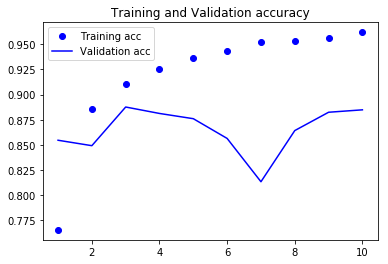

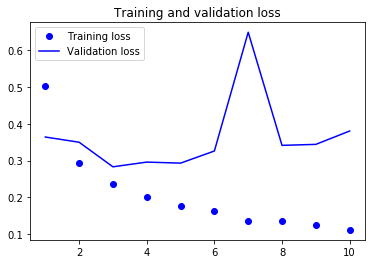

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()